## Import packages

In [20]:
# import uproot
import pyjet
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, os
from os.path import isfile, isdir, join
import importlib
import time
import re
from tqdm import tqdm
from sklearn.utils import shuffle
import logging
logging.basicConfig(level = logging.INFO)

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable


Oranges = cm.get_cmap('Oranges_r', 256)
newcolors = Oranges(np.linspace(1, 0, 256))
white = np.array([256/256, 256/256, 256/256, 1])
newcolors[:1, :] = white
newcmap = ListedColormap(newcolors, name='OrangeWhite')

%config InlineBackend. figure_format = 'retina'

In [2]:
def Loading_Data(data_source, datadict, start=0, stop=20000):
    x_jet, target = [], []

    time.sleep(0.5)
    for k in tqdm(range(start,len(data_source))):
        x_jet_path = savepath + "Image_Directory/"+ data_source["JetImage"].iloc[k]
        x_jet_tmp = np.load(x_jet_path)["jet_image"]
        if np.isnan(x_jet_tmp).any() == True:
            continue 

        target.append(data_source["Y"].iloc[k])
#         x_jet_tmp = np.divide((x_jet_tmp - Norm_dict[datadict][0]), (np.sqrt(Norm_dict[datadict][1])+1e-5))#[0].reshape(1,40,40)s
        x_jet.append(x_jet_tmp)


        if k == stop:
            break

    return np.asarray(x_jet), np.asarray(target)

## Read Data

In [3]:
HOMEPATH = "/dicos_ui_home/alanchung/Universality_Boosetd_Higgs/"
JetImagePath =  HOMEPATH + "Data_ML/" +"Image_Directory/"
savepath = HOMEPATH + "Data_ML/"


data_dict ={
        "herwig_ang" : [0,0],
        "pythia_def" : [0,0],
        "pythia_vin" : [0,0],
        "pythia_dip" : [0,0],
#             "sherpa_def" : [0,0],
          }  


data_train = {
        "herwig_ang_train" : [0,0],
        "pythia_def_train" : [0,0],
        "pythia_vin_train" : [0,0],
        "pythia_dip_train" : [0,0],
#             "sherpa_def_train" : 0
        }  


for i, element in enumerate(data_dict):
    data_dict[element][0] = pd.read_csv(savepath + str(element) + "_H_dict.csv")
    data_dict[element][1] = pd.read_csv(savepath + str(element) + "_QCD_dict.csv")
#         logging.info(len(data_dict[element][0]),len(data_dict[element][1]))

for i,(element, dict_element) in enumerate(zip(data_train, data_dict)):
#     data_train[element][0] = pd.read_csv(savepath + "/" + str(element) + ".csv")
    
    """
    PT(H) and M(H) Windows
    """
    pt_min, pt_max= 300, 500
    tmp = pd.read_csv(savepath + "/" + str(element) + ".csv")
    tmp = tmp[(tmp["PTJ_0"] >= pt_min)  & (tmp["PTJ_0"] < pt_max)]
    tmp = tmp[(tmp["MJ_0"] >= 110)  & (tmp["MJ_0"] < 160)]
    data_train[element][0] = shuffle(tmp)
    

    H_tmp = data_train[element][0][data_train[element][0]["target"] == 1]
    QCD_tmp = data_train[element][0][data_train[element][0]["target"] == 0]

    H_dict = data_dict[dict_element][0].iloc[H_tmp["index"].values]
    QCD_dict = data_dict[dict_element][1].iloc[QCD_tmp["index"].values]


    data_train[element][0] = H_dict
    data_train[element][1] = QCD_dict
#         logging.info(element)
#         logging.info(len(data_train[element][0]))

logging.info("All Files are loaded!")

logging.info("H jet : QCD jet = 1 : 1")
logging.info("\r")
H_train = [ len(data_train[element][0]) for j, element in enumerate(data_train)]
QCD_train = [ len(data_train[element][1]) for j, element in enumerate(data_train)]
logging.info("{:^10}{:^15}{:^15}{:^15}{:^15}".format("","Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole"))
logging.info("{:^10}{:^15}{:^15}{:^15}{:^15}".format("H Train #",H_train[0],H_train[1],H_train[2],H_train[3]))
logging.info("{:^10}{:^15}{:^15}{:^15}{:^15}".format("QCD Train #",QCD_train[0],QCD_train[1],QCD_train[2],QCD_train[3]))


for i, element in enumerate(data_train):
    total_list = data_train[element][0].columns
    break

logging.info("total_list {} ".format(total_list))

    
    


INFO:numexpr.utils:Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:root:All Files are loaded!
INFO:root:H jet : QCD jet = 1 : 1
INFO:root:
INFO:root:          Herwig Angular Pythia Default  Pythia Vincia  Pythia Dipole 
INFO:root:H Train #     153728         153728         153728         153728     
INFO:root:QCD Train #    153728         153728         153728         153728     
INFO:root:total_list Index(['JetImage', 'Y'], dtype='object') 


In [4]:
stop = 50000

herwig_ang_H, _ = Loading_Data(data_train["herwig_ang_train"][0], _, start=0, stop= stop)
herwig_ang_QCD, _ = Loading_Data(data_train["herwig_ang_train"][1], _, start=0, stop= stop)
pythia_def_H, _ = Loading_Data(data_train["pythia_def_train"][0], _, start=0, stop= stop)
pythia_def_QCD, _ = Loading_Data(data_train["pythia_def_train"][1], _, start=0, stop= stop)
pythia_vin_H, _ = Loading_Data(data_train["pythia_vin_train"][0], _, start=0, stop= stop)
pythia_vin_QCD, _ = Loading_Data(data_train["pythia_vin_train"][1], _, start=0, stop= stop)
pythia_dip_H, _ = Loading_Data(data_train["pythia_dip_train"][0], _, start=0, stop= stop)
pythia_dip_QCD, _ = Loading_Data(data_train["pythia_dip_train"][1], _, start=0, stop= stop)


 33%|███▎      | 50000/153728 [10:05<20:56, 82.58it/s] 


# Generate Jet Images

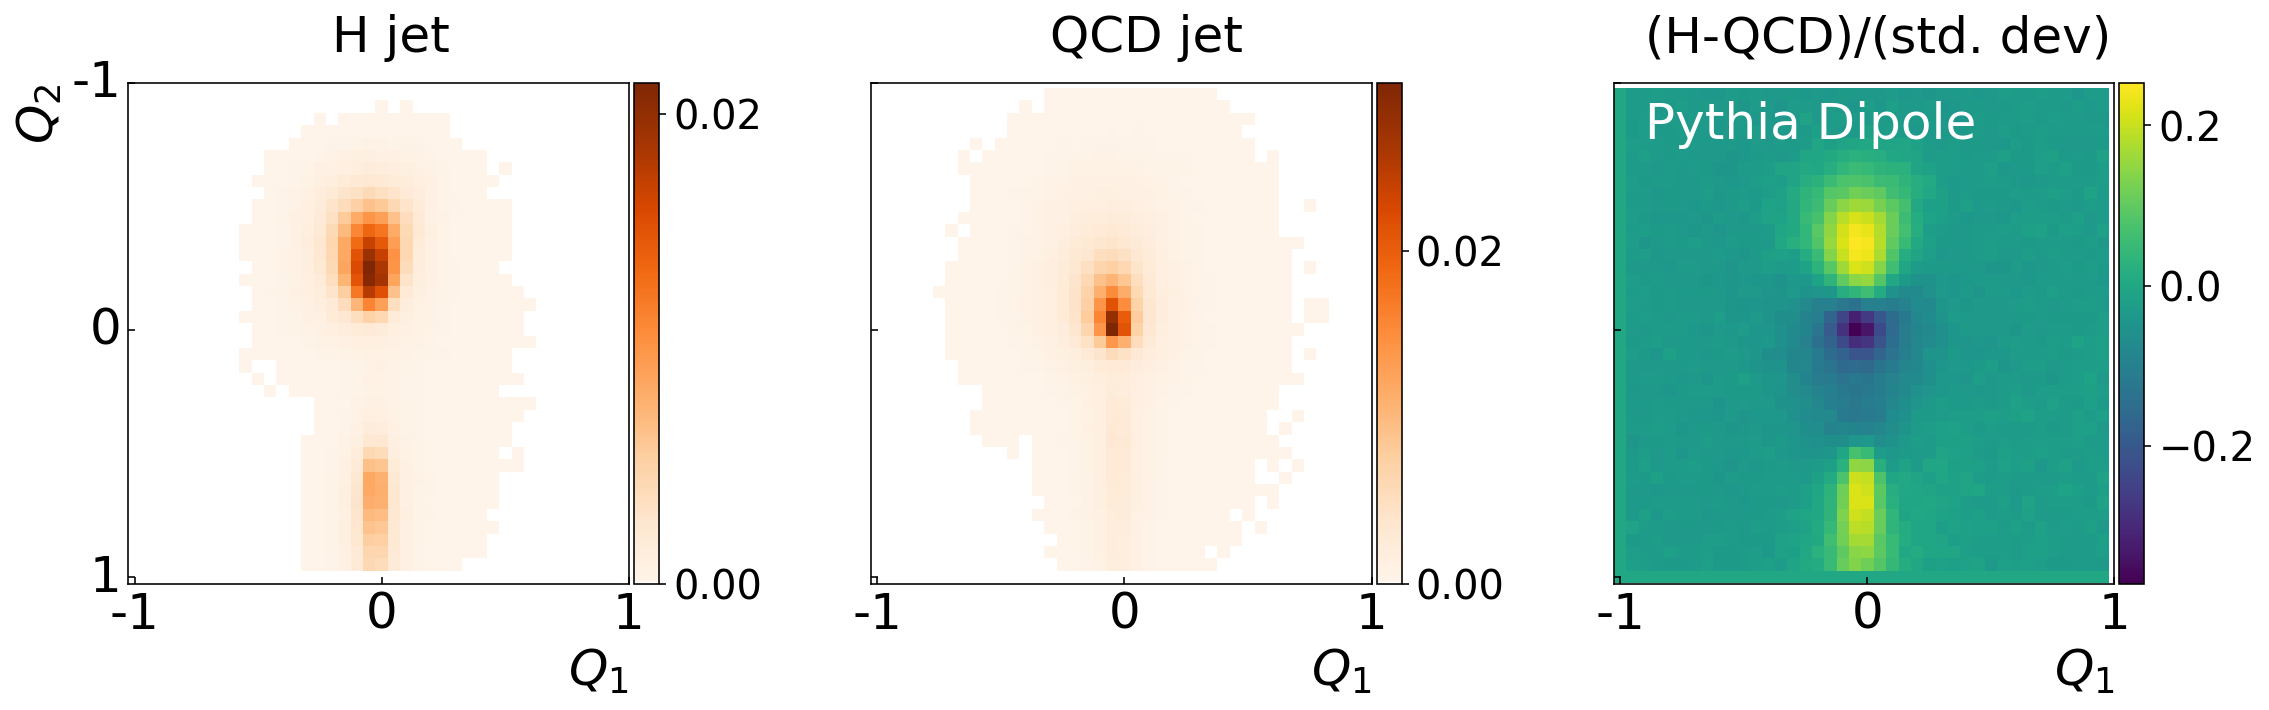

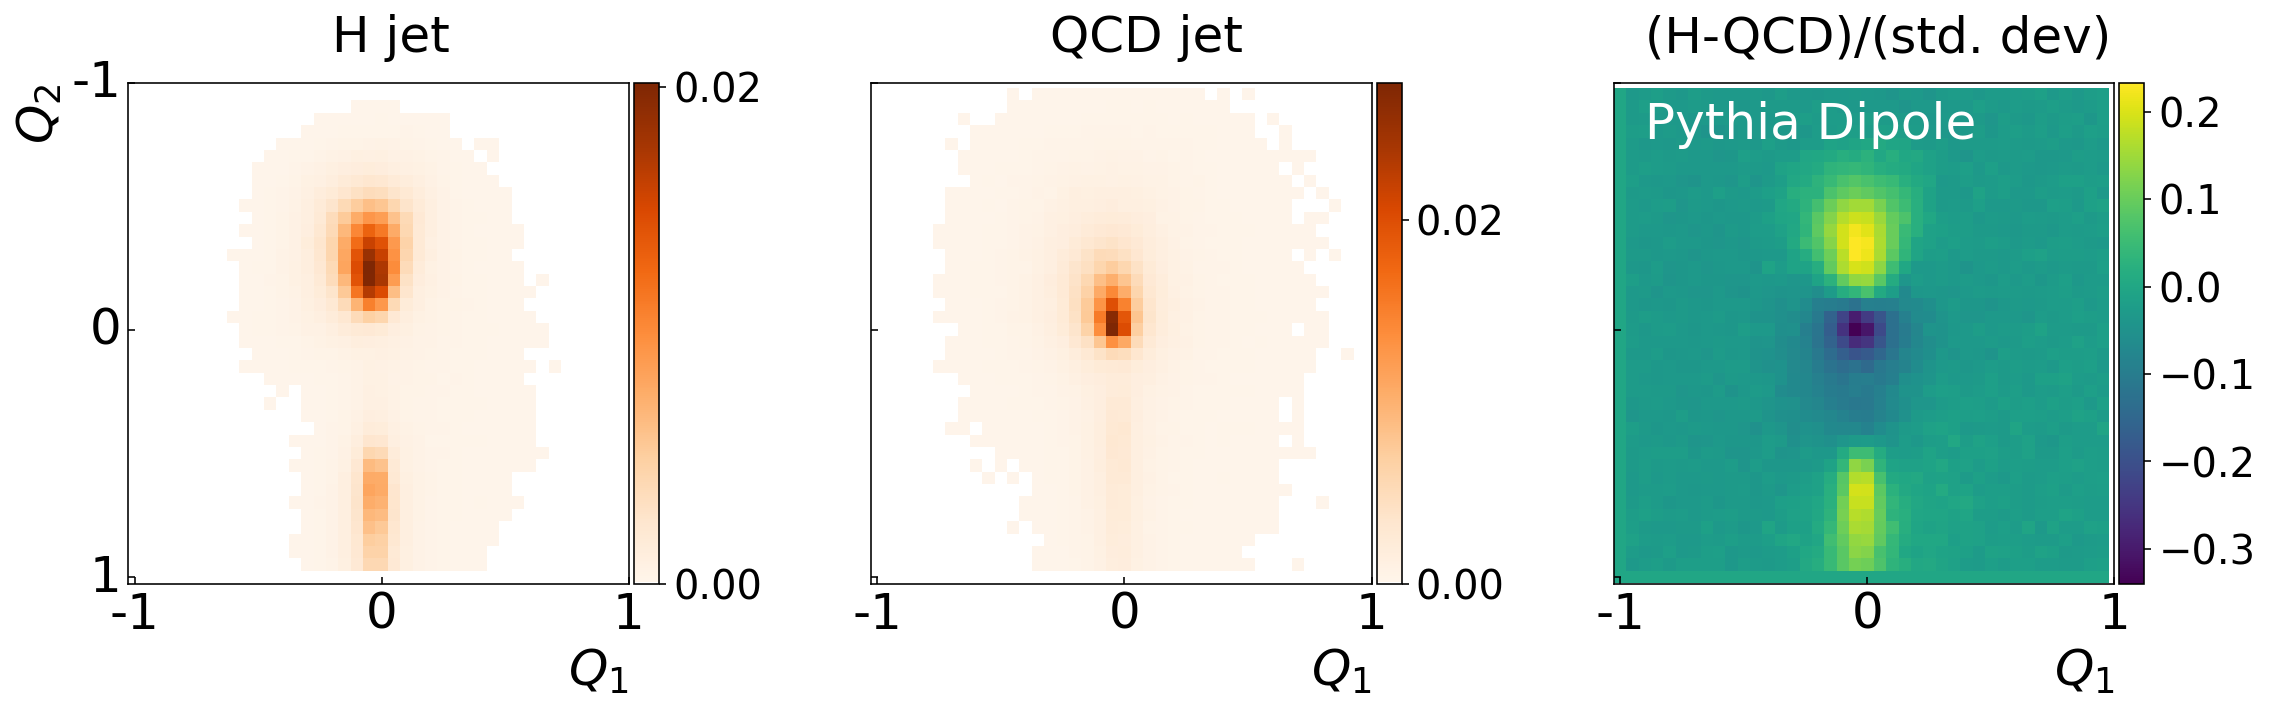

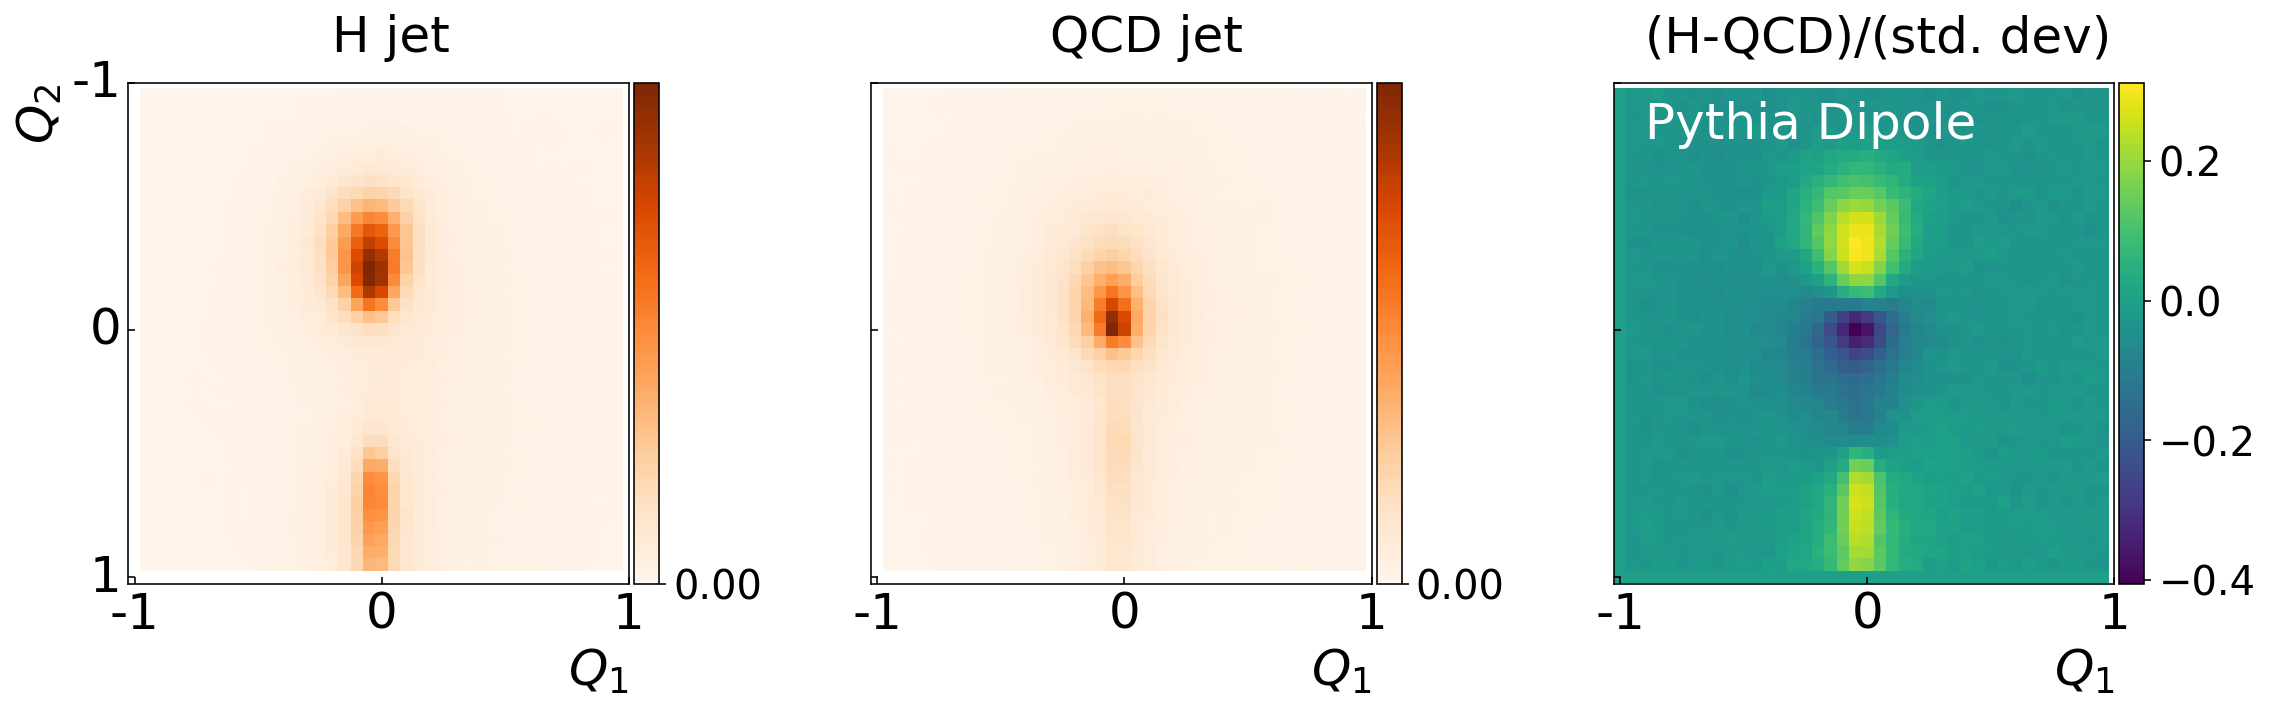

In [10]:
"""
Jet Images
"""


for channel in range(3):

    image_H = pythia_dip_H[:,channel][:40000]
    image_QCD = pythia_dip_QCD[:,channel][:40000]


    delta_jet = [
                image_H,image_QCD,(image_H-image_QCD)/(np.std(np.concatenate((image_H,image_QCD)), axis=0)+1e-5)
#                 image_H,image_QCD, np.divide((image_H-image_QCD), (np.sqrt(variance_H+variance_QCD)+1e-5))
                ]

    Name = [
             "Herwig Angular", 
             "Pythia Default",
             "Pythia Vincia", 
             "Pythia Dipole", 
#                "Sherpa Default"
            ]

    # mode_name = ["H jet", "QCD jet", "(H-QCD)/(std. dev)"]
    mode_name = ["H jet", "QCD jet", "Pythia Dipole"]
    # mode_name = ["Herwig Angular", "QCD jet", "(Herwig Angular-Pythia Default)/(std. dev)"]


    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 60))

    for index, ax in enumerate(axes.flat):

        eventimage_average = np.average(delta_jet[index],axis=0)

        im = ax.imshow(eventimage_average,
                                vmin=0, 
    #                           vmax=round(np.max(jetimage_average),3),
    #                           vmax=0.08,
                              cmap=newcmap, 
                           origin='lower')
        if index == 2:
            im = ax.imshow(eventimage_average,
                           vmin=round(np.min(eventimage_average),3), 
                            vmax=round(np.max(eventimage_average),3),
                           cmap="viridis", 
                           origin='lower')

        ax.set_yticks([0,20,40])
        ax.set_yticklabels(["","",""], fontsize=25, rotation=0)
        ax.tick_params(axis='y', direction="in")

    #     ax.set_xticks([0,20,40])
    #     ax.set_xticklabels(["","",""], fontsize=25, rotation=0)
    #     ax.tick_params(axis='x', direction="in")

        ax.set_xticks([0,20,40])
        ax.set_xticklabels(["-1","0","1"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")
        ax.set_xlabel("$Q_1$", fontsize=25,horizontalalignment='right',x=1)
        ax.tick_params(axis='x', direction="in")

        if index == 0: 
            ax.set_yticks([0,20,40])
            # plot_axis.set_yticks([20,25,30])
            ax.set_yticklabels(["1","0","-1"], fontsize=25, rotation=0, verticalalignment='center', horizontalalignment="right")
            ax.set_ylabel("$Q_2$", fontsize=25, horizontalalignment='right',y=1)
    #         ax.text(x=2, y=38, s="Pythia Default",c="k",fontsize=25)

            ax.text(x=16, y=42.5, s=str(mode_name[index]),fontsize=25)
    #         ax.text(x=2, y=38, s="p("+str(mode_name[index])+") > 0.9",fontsize=25)
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad="1%")
            cbar = plt.colorbar(im, cax=cax)
            cbar.ax.tick_params(labelsize=20)
            cbar.set_ticks(np.arange(0, 1, 0.02))


        elif index == 1:
    #         ax.text(x=0, y=36, s=str(mode_name[index]),fontsize=25)
            ax.text(x=14, y=42.5, s=str(mode_name[index]),fontsize=25)
    #         ax.text(x=2, y=38, s="p("+str(mode_name[index])+") > 0.9",fontsize=25)
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad="1%")
            cbar = plt.colorbar(im, cax=cax)
            cbar.ax.tick_params(labelsize=20)
            cbar.set_ticks(np.arange(0, 1, 0.02))


        elif index == 2:
            ax.text(x=2, y=35.5, s=str(mode_name[index]),fontsize=25, color="w")
            ax.text(x=2, y=42.5, s="(H-QCD)/(std. dev)", fontsize=25)

        else:
            pass


#         if index == 1:
#             ax.text(x=53, y=38, s="normalized to unity", fontsize=25, rotation=270)


    fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                        wspace=0.02, hspace=0.02)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad="1%")
    cbar = plt.colorbar(im, cax=cax)
    cbar.ax.tick_params(labelsize=20)
    # cbar.set_ticks(np.arange(-0.1, 0.12, 0.04))


    plt.subplots_adjust(wspace=0.4, hspace=0.5)
#     plt.savefig("./Plots/jet_image_H_sub_QCD_pythia_dip_"+str(channel)+".pdf", transparent=True, bbox_inches='tight')
    plt.show()

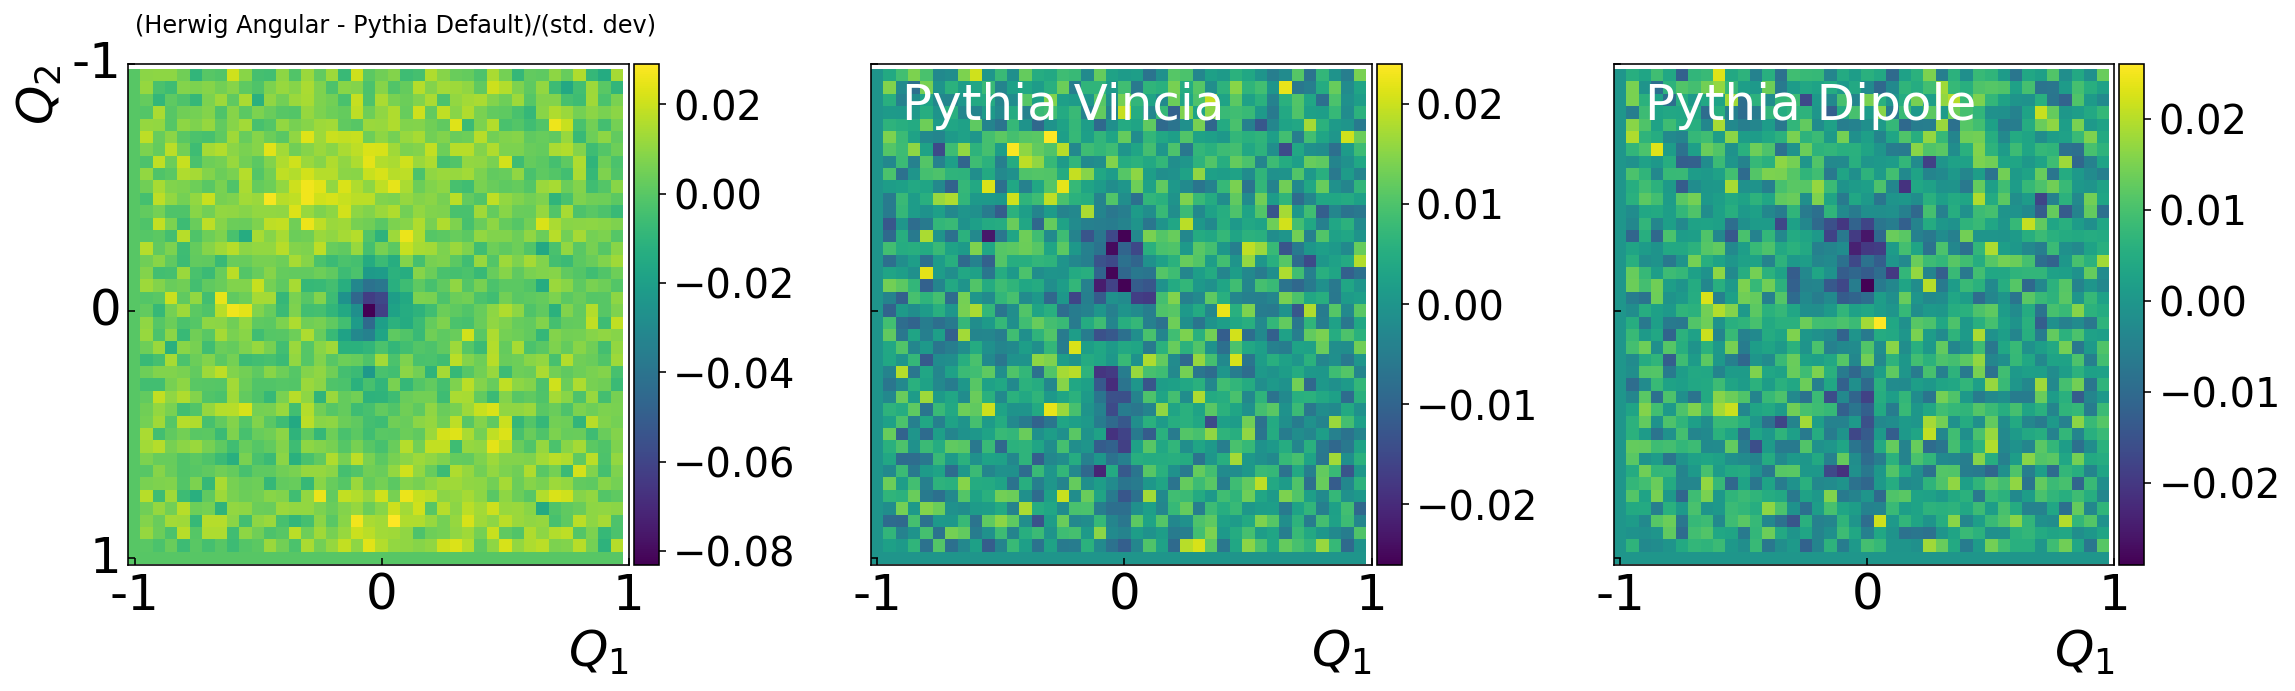

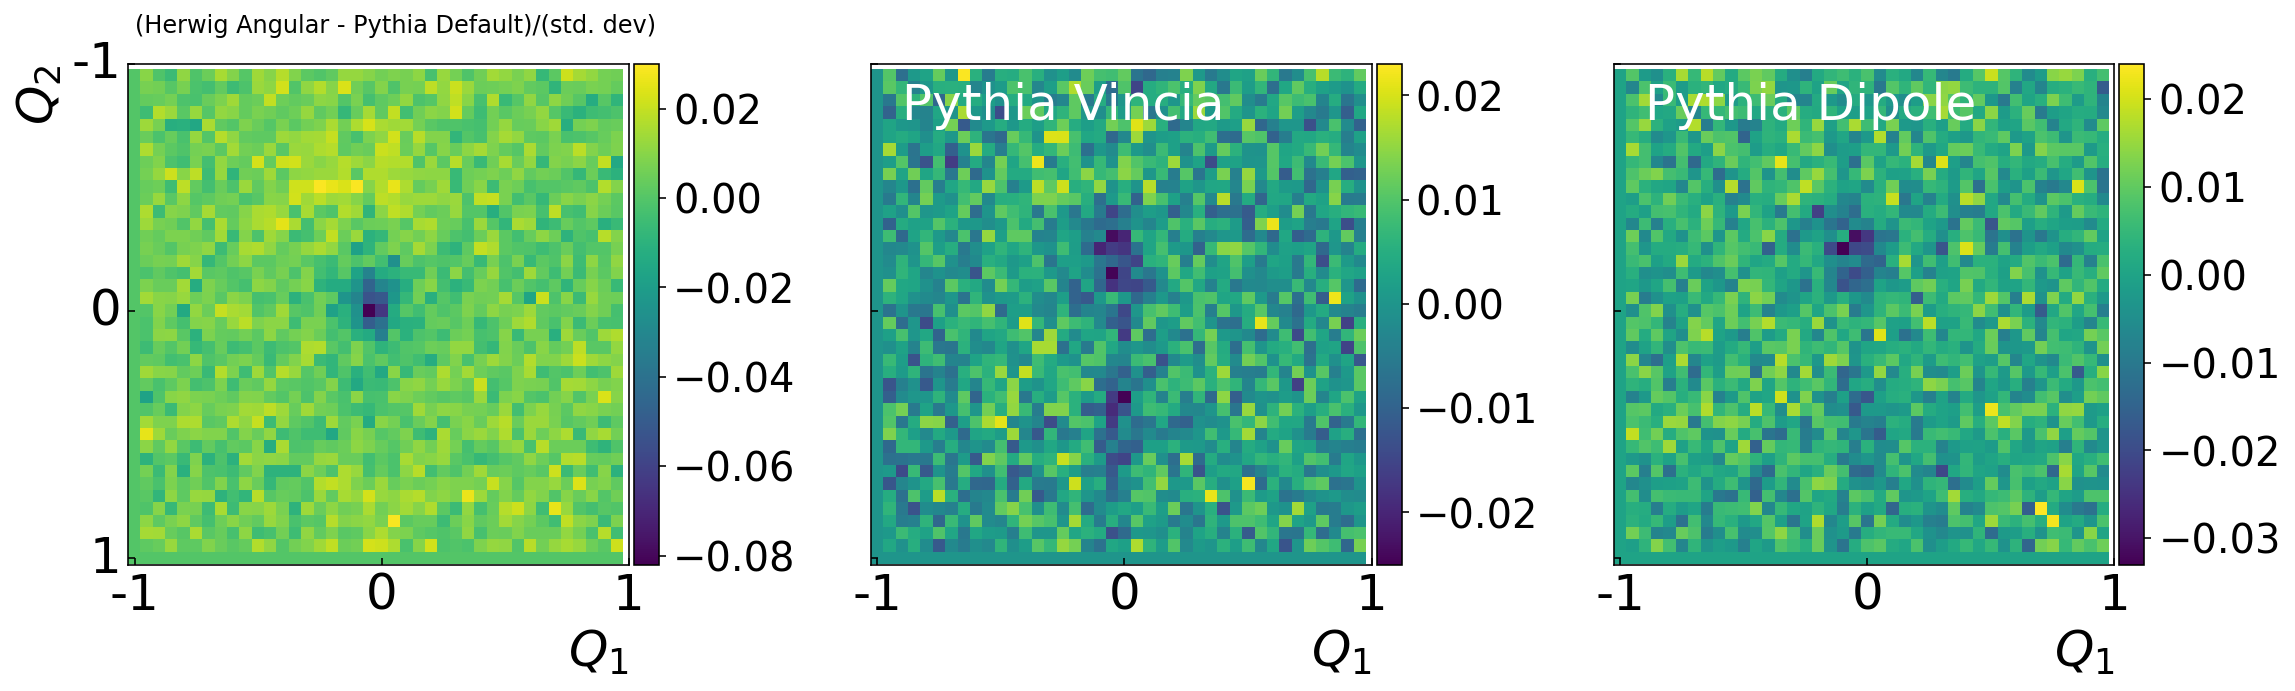

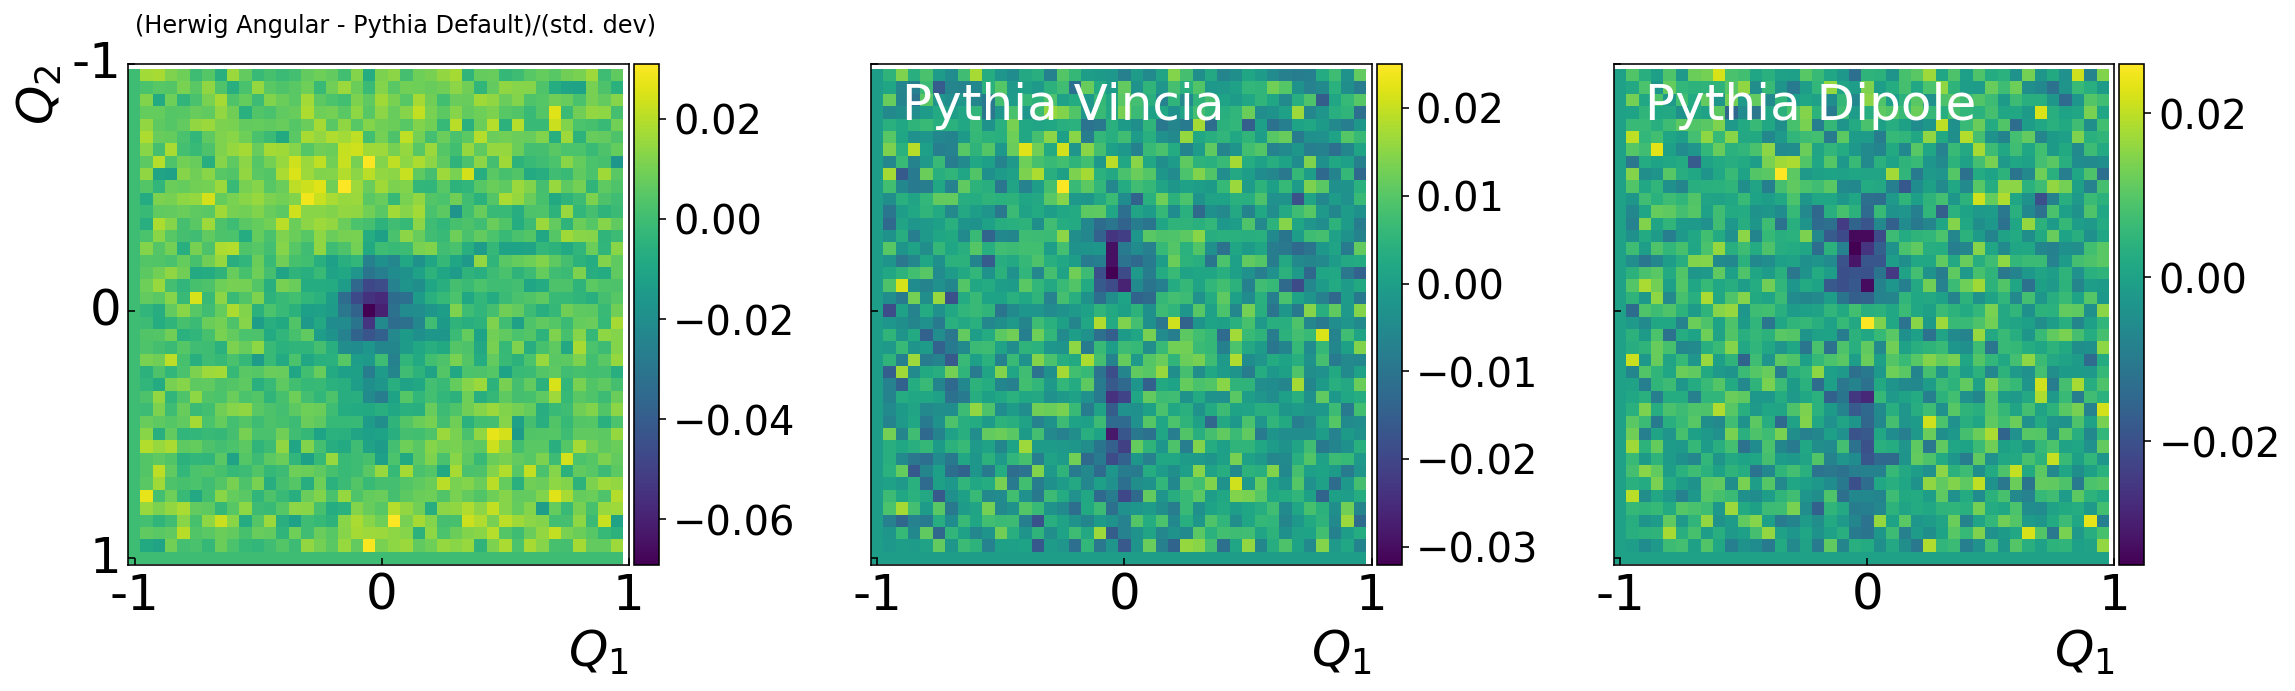

In [25]:
"""
Jet Images
"""


for channel in range(3):

    delta_jet = [
                (herwig_ang_QCD[:,channel][:40000]-pythia_def_QCD[:,channel][:40000])/(np.std(np.concatenate((herwig_ang_QCD[:,channel][:40000],pythia_def_QCD[:,channel][:40000])), axis=0)+1e-5),
                (pythia_vin_QCD[:,channel][:40000]-pythia_def_QCD[:,channel][:40000])/(np.std(np.concatenate((pythia_vin_QCD[:,channel][:40000],pythia_def_QCD[:,channel][:40000])), axis=0)+1e-5),
                (pythia_dip_QCD[:,channel][:40000]-pythia_def_QCD[:,channel][:40000])/(np.std(np.concatenate((pythia_dip_QCD[:,channel][:40000],pythia_def_QCD[:,channel][:40000])), axis=0)+1e-5),
                ]

    Name = [
             "Herwig Angular", 
             "Pythia Default",
             "Pythia Vincia", 
             "Pythia Dipole", 
#                "Sherpa Default"
            ]

    # mode_name = ["H jet", "QCD jet", "(H-QCD)/(std. dev)"]
#     mode_name = ["H jet", "QCD jet", "Herwig Angular"]
    # mode_name = ["Herwig Angular", "QCD jet", "(Herwig Angular-Pythia Default)/(std. dev)"]


    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 60))

    for index, ax in enumerate(axes.flat):

        eventimage_average = np.average(delta_jet[index],axis=0)

        im = ax.imshow(eventimage_average,
                           vmin=round(np.min(eventimage_average),3), 
                            vmax=round(np.max(eventimage_average),3),
                           cmap="viridis", 
                           origin='lower')

        ax.set_yticks([0,20,40])
        ax.set_yticklabels(["","",""], fontsize=25, rotation=0)
        ax.tick_params(axis='y', direction="in")

    #     ax.set_xticks([0,20,40])
    #     ax.set_xticklabels(["","",""], fontsize=25, rotation=0)
    #     ax.tick_params(axis='x', direction="in")

        ax.set_xticks([0,20,40])
        ax.set_xticklabels(["-1","0","1"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")
        ax.set_xlabel("$Q_1$", fontsize=25,horizontalalignment='right',x=1)
        ax.tick_params(axis='x', direction="in")

        if index == 0: 
            ax.set_yticks([0,20,40])
            # plot_axis.set_yticks([20,25,30])
            ax.set_yticklabels(["1","0","-1"], fontsize=25, rotation=0, verticalalignment='center', horizontalalignment="right")
            ax.set_ylabel("$Q_2$", fontsize=25, horizontalalignment='right',y=1)

#             ax.text(x=2, y=35.5, s=str(Name[0]),fontsize=25, color="w")
            ax.text(x=0, y=42.5, s=str("(Herwig Angular - Pythia Default)/(std. dev)"),fontsize=12)
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad="1%")
            cbar = plt.colorbar(im, cax=cax)
            cbar.ax.tick_params(labelsize=20)
#             cbar.set_ticks(np.arange(0, 1, 0.02))


        elif index == 1:
            ax.text(x=2, y=35.5, s=str(Name[2]),fontsize=25, color="w")
#     #         ax.text(x=0, y=36, s=str(mode_name[index]),fontsize=25)
#             ax.text(x=14, y=42.5, s=str(mode_name[index]),fontsize=25)
#     #         ax.text(x=2, y=38, s="p("+str(mode_name[index])+") > 0.9",fontsize=25)
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad="1%")
            cbar = plt.colorbar(im, cax=cax)
            cbar.ax.tick_params(labelsize=20)
#             cbar.set_ticks(np.arange(0, 1, 0.02))


        elif index == 2:
            ax.text(x=2, y=35.5, s=str(Name[3]),fontsize=25, color="w")
#             ax.text(x=2, y=35.5, s=str(mode_name[index]),fontsize=25, color="w")
#             ax.text(x=2, y=42.5, s="(H-QCD)/(std. dev)", fontsize=25)

        else:
            pass


#         if index == 1:
#             ax.text(x=53, y=38, s="normalized to unity", fontsize=25, rotation=270)


    fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                        wspace=0.02, hspace=0.02)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad="1%")
    cbar = plt.colorbar(im, cax=cax)
    cbar.ax.tick_params(labelsize=20)
    # cbar.set_ticks(np.arange(-0.1, 0.12, 0.04))


    plt.subplots_adjust(wspace=0.4, hspace=0.5)
#     plt.savefig("./Plots/jet_image_any_QCD_sub_pythia_def_QCD_"+str(channel)+".pdf", transparent=True, bbox_inches='tight')
    plt.show()